<a href="https://colab.research.google.com/github/G736saini/gajanand/blob/main/image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

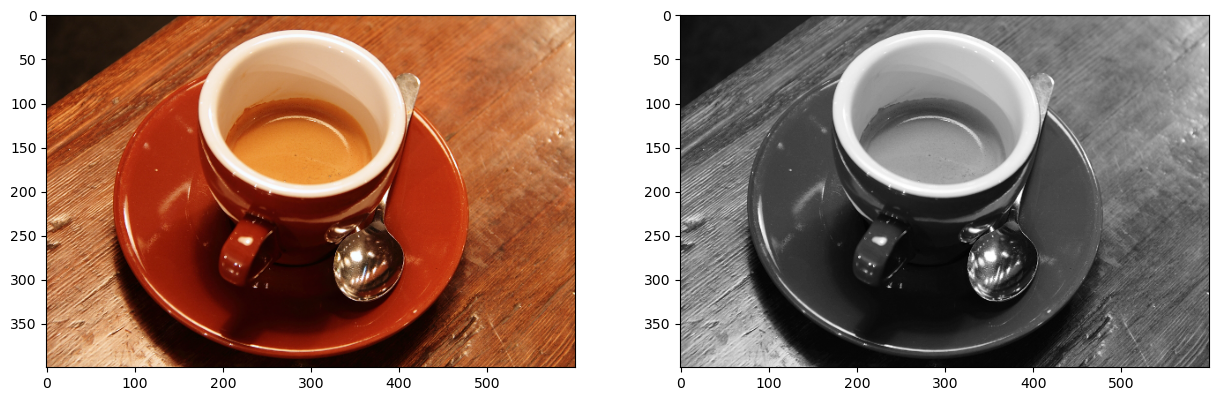

In [ ]:
# Importing Necessary Libraries
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

# Sample Image of scikit-image package
coffee = data.coffee()
plt.subplot(1, 2, 1)

# Displaying the sample image
plt.imshow(coffee)

# Converting RGB image to Monochrome
gray_coffee = rgb2gray(coffee)
plt.subplot(1, 2, 2)

# Displaying the sample image - Monochrome
# Format
plt.imshow(gray_coffee, cmap="gray")

Segmentation by Thresholding – Manual Input

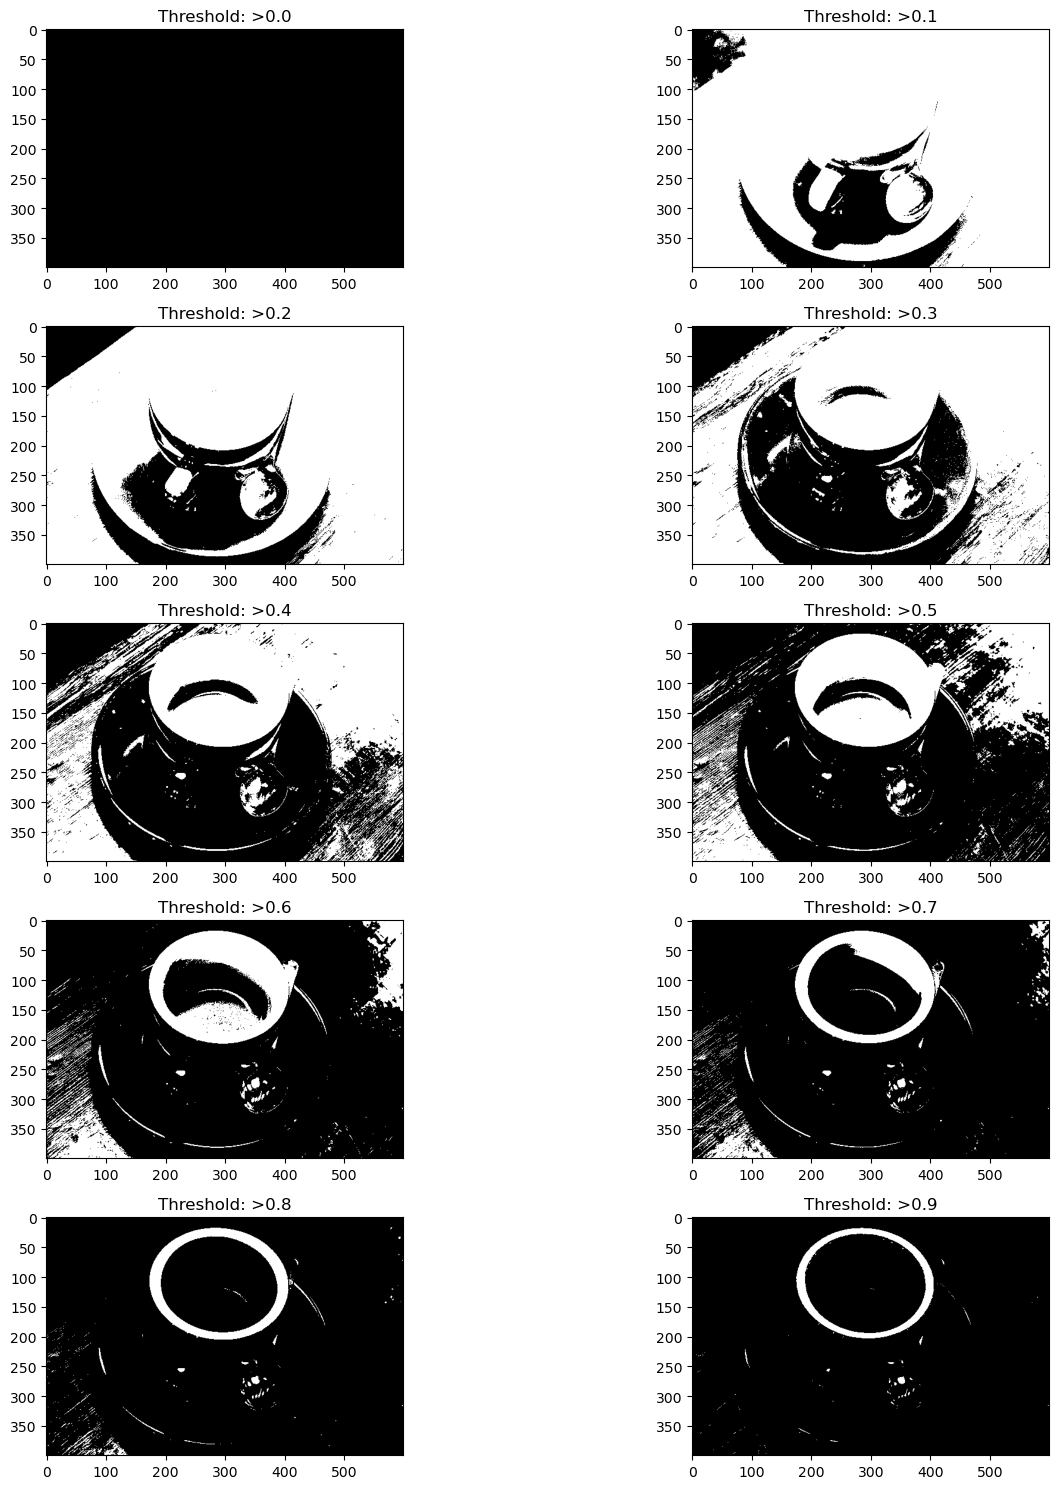

In [ ]:
# Importing Necessary Libraries
# Displaying the sample image - Monochrome Format
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Sample Image of scikit-image package
coffee = data.coffee()
gray_coffee = rgb2gray(coffee)

# Setting the plot size to 15,15
plt.figure(figsize=(15, 15))

for i in range(10):

  # Iterating different thresholds
  binarized_gray = (gray_coffee > i*0.1)*1
  plt.subplot(5,2,i+1)

  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*0.1,1)))

  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap = 'gray')

plt.tight_layout()

Active Contour Segmentation

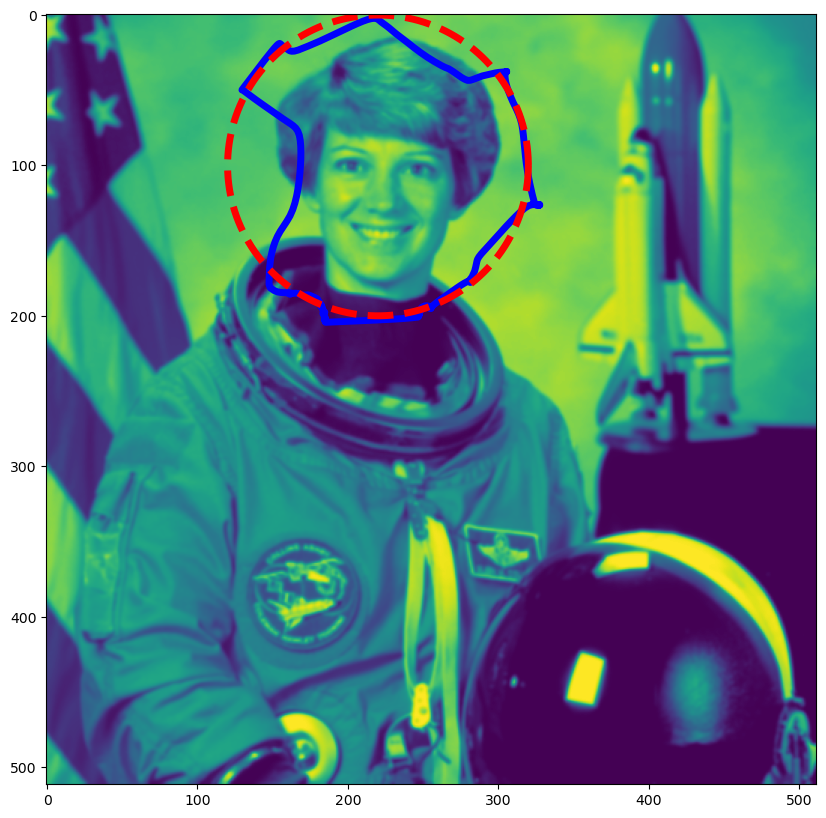

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

# Sample Image of scikit-image package
astronaut = data.astronaut()
gray_astronaut = rgb2gray(astronaut)

# Applying Gaussian Filter to remove noise
gray_astronaut_noiseless = gaussian(gray_astronaut, 1)

# Localising the circle's center at 220, 110
x1 = 220 + 100 * np.cos(np.linspace(0, 2 * np.pi, 500))
x2 = 100 + 100 * np.sin(np.linspace(0, 2 * np.pi, 500))

# Generating a circle based on x1, x2
snake = np.array([x1, x2]).T

# Computing the Active Contour for the given image
astronaut_snake = active_contour(gray_astronaut_noiseless, snake)

fig = plt.figure(figsize=(10, 10))

# Adding subplots to display the markers
ax = fig.add_subplot(111)

# Plotting sample image
ax.imshow(gray_astronaut_noiseless)

# Plotting the face boundary marker
ax.plot(astronaut_snake[:, 0], astronaut_snake[:, 1], '-b', lw=5)

# Plotting the circle around face
ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5)

plt.show()


<class 'numpy.ndarray'> (225, 225, 3) uint8


C:\Users\hp\AppData\Local\Temp\ipykernel_38208\3979271942.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('images/pepper.jpg')


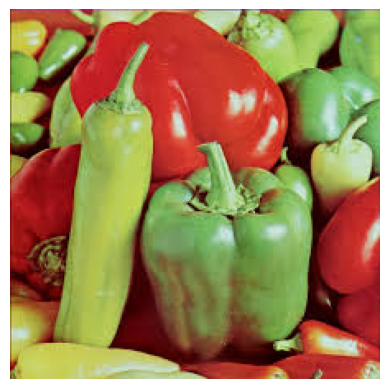

(<matplotlib.image.AxesImage at 0x24b536babd0>,
 (-0.5, 224.5, 224.5, -0.5),
 None)

In [ ]:
import imageio
im = imageio.imread('images/pepper.jpg')
print(type(im), im.shape, im.dtype)
plt.imshow(im), plt.axis('off'), plt.show()

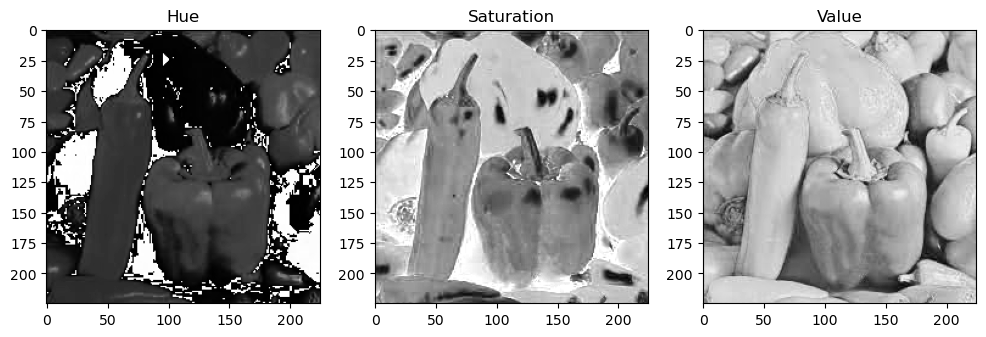

In [ ]:
from skimage.color import rgb2hsv
im_hsv = rgb2hsv(im)

fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(im_hsv[:,:,0], cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(im_hsv[:,:,1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(im_hsv[:,:,2], cmap='gray')
ax[2].set_title('Value');

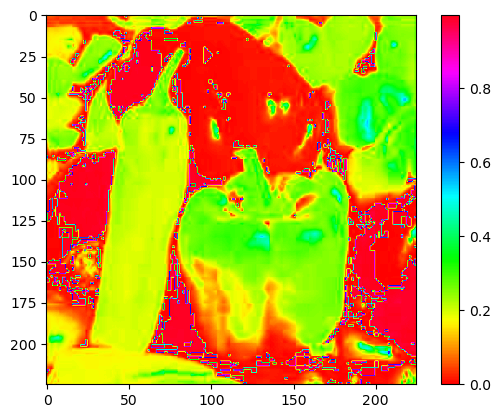

In [ ]:
plt.imshow(im_hsv[:,:,0],cmap='hsv')
plt.colorbar()

Let us now try to threshold the image using the Hue par of the HSV color channel to segment the image.

# Red

C:\Users\hp\AppData\Local\Temp\ipykernel_38208\4221712299.py:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(im_masked)


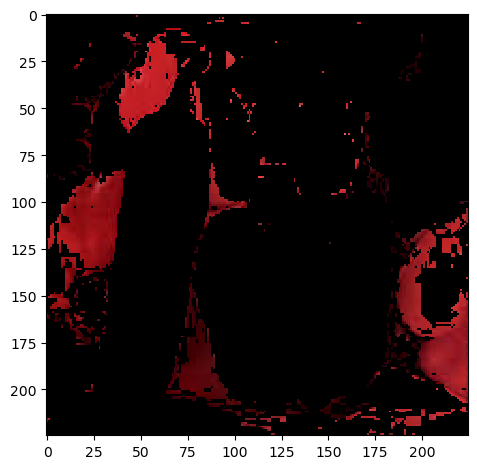

In [ ]:
from skimage.io import imread, imshow
lower_mask = im_hsv[:,:,0] > 0.90
upper_mask = im_hsv[:,:,0] < 1
mask = upper_mask*lower_mask
plt.imshow(mask)
red = im[:,:,0]*mask
green = im[:,:,1]*mask
blue = im[:,:,2]*mask
im_masked = np.dstack((red,green,blue))
imshow(im_masked)

# Yellow

C:\Users\hp\AppData\Local\Temp\ipykernel_38208\329238210.py:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(im_masked)


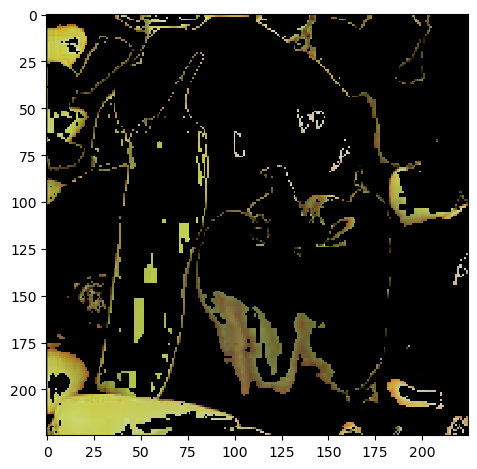

In [ ]:
lower_mask = im_hsv[:,:,0] > 0.08
upper_mask = im_hsv[:,:,0] < 0.19
mask = upper_mask*lower_mask
plt.imshow(mask)

red = im[:,:,0]*mask
green = im[:,:,1]*mask
blue = im[:,:,2]*mask
im_masked = np.dstack((red,green,blue))
imshow(im_masked)

# Blue

C:\Users\hp\AppData\Local\Temp\ipykernel_38208\2271477898.py:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(im_masked)
C:\Users\hp\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


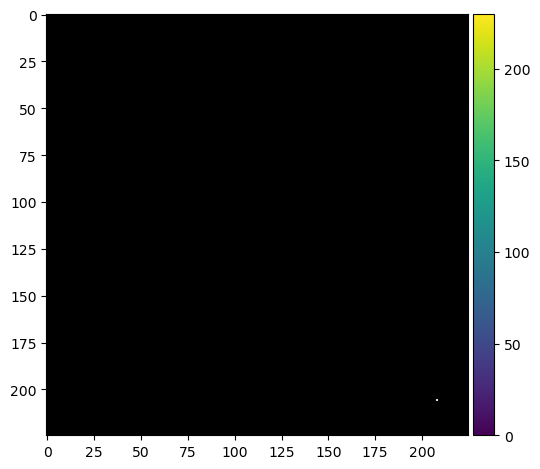

In [ ]:
lower_mask = im_hsv[:,:,0] > 0.58
upper_mask = im_hsv[:,:,0] < 0.7
mask = upper_mask*lower_mask
plt.imshow(mask)

red = im[:,:,0]*mask
green = im[:,:,1]*mask
blue = im[:,:,2]*mask
im_masked = np.dstack((red,green,blue))
imshow(im_masked)